In [27]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)  # to join lattitudes and longitudes as a tuple that have the same index, and can be accessed wit 0,1
lat_lngs 

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [17]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

64.33508164314716 163.00855926130697
89.44813952222813 118.06901458086764
-73.56448662032605 48.875681193230776
-6.098416314405725 44.02258681008732
34.232013881889 88.60320950923074
-2.9158330498834886 -21.89406914914619
-22.05060940094036 -128.83214319256206
-50.99801147354136 -44.46939067405725
-83.92130159594947 -134.31352988425158
45.79730564814574 -113.02874366673066
-6.281962119091077 -7.178268460562208
-4.7673701308868885 161.19484478298972
87.64108646815504 125.47028223286537
44.60867837223557 -141.35426281210877
79.98582923857504 13.385993963666124
49.88421031159973 -80.56837090964756
87.29426571061109 -81.06134365542427
12.334948662052923 -83.46279003969795
-41.476794439811954 23.20370367154098
-25.852886258906395 -158.12215571493016
-69.43283364735716 -67.81840311251594
-30.30241798858112 -155.56460617314826
-34.087710516023584 -100.0376560385684
20.20779464166833 -71.60984017420823
50.14745002818137 -54.538466486769025
-19.741308299167144 114.74842909914241
71.785780284024

In [18]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kamenskoye ru
saskylakh ru
port alfred za
micheweni tz
lasa cn
georgetown sh
rikitea pf
mar del plata ar
rikitea pf
anaconda us
georgetown sh
buala sb
tiksi ru
sitka us
barentsburg sj
cochrane ca
qaanaaq gl
laguna de perlas ni
plettenberg bay za
avarua ck
ushuaia ar
avera pf
lebu cl
monte cristi do
lewisporte ca
karratha au
klaksvik fo
saldanha za
salsk ru
bonavista ca
yellowknife ca
hasaki jp
puerto ayora ec
shingu jp
saleaula ws
dikson ru
upernavik gl
ushuaia ar
cape town za
bredasdorp za
ushuaia ar
barentsburg sj
taolanaro mg
clarksburg us
cape town za
clyde river ca
pevek ru
bethel us
geraldton au
rikitea pf
necochea ar
grand river south east mu
punta arenas cl
christchurch nz
yambio sd
castro cl
palana ru
saint-philippe re
ambulu id
busselton au
geraldton au
tuktoyaktuk ca
provideniya ru
atuona pf
bosaso so
cockburn town bs
ushuaia ar
wamba cd
sentyabrskiy ru
airai pw
marawi sd
jamestown sh
ilulissat gl
faanui pf
shitanjing cn
guerrero negro mx
cape town za
suamico us
rikitea pf
p

khatanga ru
nanning cn
hilo us
port lincoln au
northam au
port alfred za
avarua ck
norman wells ca
katsuura jp
bethel us
punta arenas cl
ushuaia ar
hobart au
bada ru
kawalu id
taperoa br
murmashi ru
port alfred za
yilan cn
hermanus za
kapaa us
albany au
inongo cd
busselton au
la ronge ca
longyearbyen sj
hithadhoo mv
nguiu au
busselton au
prachin buri th
mataura pf
caninde de sao francisco br
lebu cl
barrow us
varadero cu
ushuaia ar
luena ao
qaanaaq gl
saskylakh ru
khatanga ru
kalengwa zm
hovd mn
chokurdakh ru
upernavik gl
mataura pf
butaritari ki
sentyabrskiy ru
hithadhoo mv
punta arenas cl
nyurba ru
cidreira br
chaadayevka ru
tuktoyaktuk ca
mataura pf
lar in
presidente epitacio br
bluff nz
vega de alatorre mx
hermanus za
cape town za
riyadh sa
marathon us
artyom az
busselton au
kisoro ug
nexo dk
saint-augustin ca
illoqqortoormiut gl
qaanaaq gl
rikitea pf
hamilton bm
puerto ayora ec
ushuaia ar
hithadhoo mv
ponta do sol cv
sabzevar ir
alyangula au
kununurra au
taolanaro mg
barrow us
bus

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [26]:
# Import the requests library.
import requests

#Import the API key
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [31]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [38]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | micheweni
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mar del plata
Processing Record 9 of Set 1 | anaconda
Processing Record 10 of Set 1 | buala
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | cochrane
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | laguna de perlas
Processing Record 17 of Set 1 | plettenberg bay
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | lebu
Processing Record 22 of S

Processing Record 38 of Set 4 | hilo
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | ossora
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | terrace
Processing Record 43 of Set 4 | santa cruz
Processing Record 44 of Set 4 | pedernales
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | suao
City not found. Skipping...
Processing Record 47 of Set 4 | maceio
Processing Record 48 of Set 4 | barcelos
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | dogondoutchi
Processing Record 2 of Set 5 | mombasa
Processing Record 3 of Set 5 | san andres
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | grand gaube
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | atasu
Processing Record 8 of Set 5 | mogochin
City not found. Skipping...
Processing Record 9 of Set 5 | barrow
Processing Record 10 of Set 5 | lima
Processin

Processing Record 32 of Set 8 | naples
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | liverpool
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | seymchan
Processing Record 38 of Set 8 | codrington
Processing Record 39 of Set 8 | luba
Processing Record 40 of Set 8 | okha
Processing Record 41 of Set 8 | samandag
Processing Record 42 of Set 8 | manado
Processing Record 43 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 44 of Set 8 | kalevala
Processing Record 45 of Set 8 | lesozavodsk
Processing Record 46 of Set 8 | shwebo
Processing Record 47 of Set 8 | iringa
Processing Record 48 of Set 8 | svetlyy
Processing Record 49 of Set 8 | tiarei
Processing Record 50 of Set 8 | broken hill
Processing Record 1 of Set 9 | valente
Processing Record 2 of Set 9 | ganzhou
Processing Record 3 of Set 9 | ailigandi
Processing Record 4 of Set 9 | los llanos de aridane
Processing

Processing Record 20 of Set 12 | paamiut
Processing Record 21 of Set 12 | mardin
Processing Record 22 of Set 12 | cololaca
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | golovchino
Processing Record 25 of Set 12 | pitimbu
Processing Record 26 of Set 12 | ozark
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | namtsy
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | ostrovnoy
Processing Record 32 of Set 12 | tigil
Processing Record 33 of Set 12 | verkhoyansk
Processing Record 34 of Set 12 | makat
Processing Record 35 of Set 12 | waddan
Processing Record 36 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 37 of Set 12 | laredo
Processing Record 38 of Set 12 | espita
Processing Record 39 of Set 12 | manta
Processing Record 40 of Set 12 | linjiang
Processing Record 41 of Set 12 | bargal
City not found. Skipping...
Processing Record 42 of Set 12 | great 

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,50.00,64,95,7.87,RU,2022-07-22 21:04:43
1,Port Alfred,-33.5906,26.8910,63.50,64,100,10.00,ZA,2022-07-22 21:04:44
2,Micheweni,-4.9667,39.8333,73.51,82,27,11.43,TZ,2022-07-22 21:04:44
3,Lasa,46.6166,10.7002,68.09,83,85,2.48,IT,2022-07-22 21:04:44
4,Georgetown,5.4112,100.3354,78.89,90,20,0.00,MY,2022-07-22 21:04:45
5,Rikitea,-23.1203,-134.9692,72.37,75,100,9.82,PF,2022-07-22 21:04:45
6,Mar Del Plata,-38.0023,-57.5575,52.09,75,0,6.91,AR,2022-07-22 21:04:45
7,Anaconda,46.1285,-112.9423,88.79,13,61,12.57,US,2022-07-22 21:04:46
8,Buala,-8.1450,159.5921,81.00,80,11,5.19,SB,2022-07-22 21:04:46
9,Tiksi,71.6872,128.8694,46.71,80,86,6.15,RU,2022-07-22 21:04:46


In [40]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [41]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-07-22 21:04:43,71.9167,114.0833,50.00,64,95,7.87
1,Port Alfred,ZA,2022-07-22 21:04:44,-33.5906,26.8910,63.50,64,100,10.00
2,Micheweni,TZ,2022-07-22 21:04:44,-4.9667,39.8333,73.51,82,27,11.43
3,Lasa,IT,2022-07-22 21:04:44,46.6166,10.7002,68.09,83,85,2.48
4,Georgetown,MY,2022-07-22 21:04:45,5.4112,100.3354,78.89,90,20,0.00


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

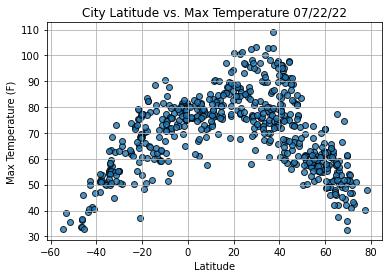

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

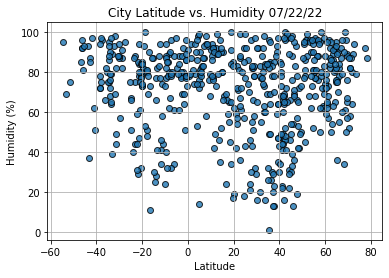

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

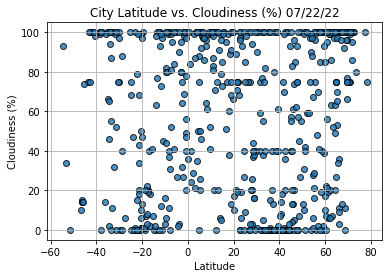

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

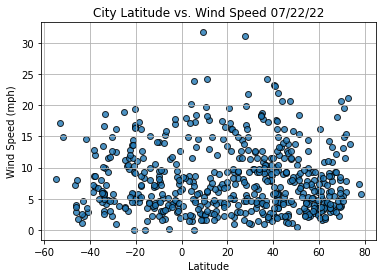

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [87]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [88]:
index13 = city_data_df.loc[13]
index13

City             Laguna De Perlas
Country                        NI
Date          2022-07-22 21:04:48
Lat                       12.3429
Lng                      -83.6712
Max Temp                    76.66
Humidity                       92
Cloudiness                    100
Wind Speed                   8.25
Name: 13, dtype: object

In [89]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
559     True
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [90]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-07-22 21:04:43,71.9167,114.0833,50.00,64,95,7.87
3,Lasa,IT,2022-07-22 21:04:44,46.6166,10.7002,68.09,83,85,2.48
4,Georgetown,MY,2022-07-22 21:04:45,5.4112,100.3354,78.89,90,20,0.00
7,Anaconda,US,2022-07-22 21:04:46,46.1285,-112.9423,88.79,13,61,12.57
9,Tiksi,RU,2022-07-22 21:04:46,71.6872,128.8694,46.71,80,86,6.15


In [91]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-07-22 21:04:43,71.9167,114.0833,50.00,64,95,7.87
3,Lasa,IT,2022-07-22 21:04:44,46.6166,10.7002,68.09,83,85,2.48
4,Georgetown,MY,2022-07-22 21:04:45,5.4112,100.3354,78.89,90,20,0.00
7,Anaconda,US,2022-07-22 21:04:46,46.1285,-112.9423,88.79,13,61,12.57
9,Tiksi,RU,2022-07-22 21:04:46,71.6872,128.8694,46.71,80,86,6.15


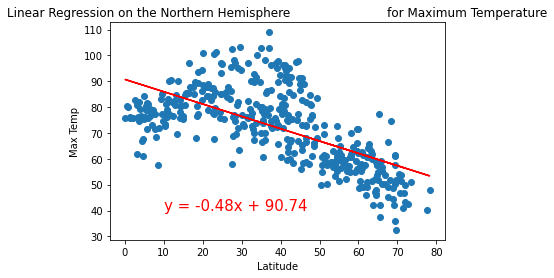

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

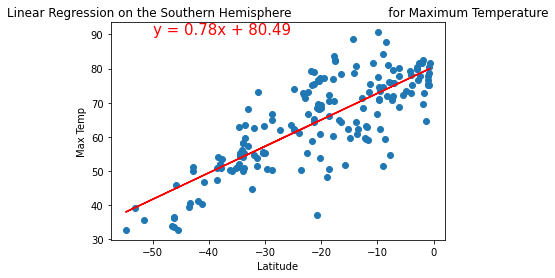

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

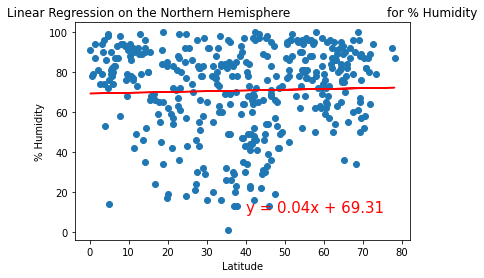

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

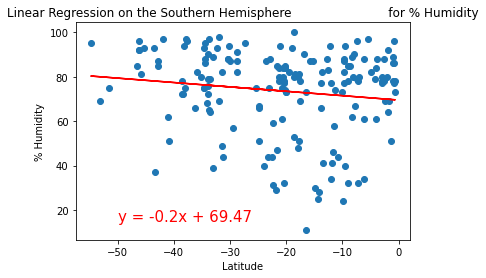

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

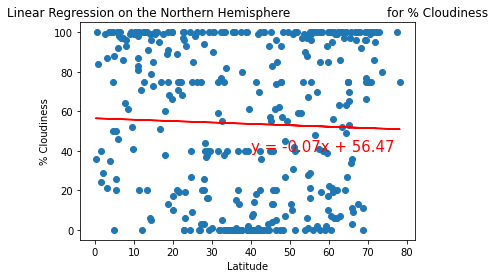

In [96]:
# Linear regression on the Northern Hemisphere vs Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

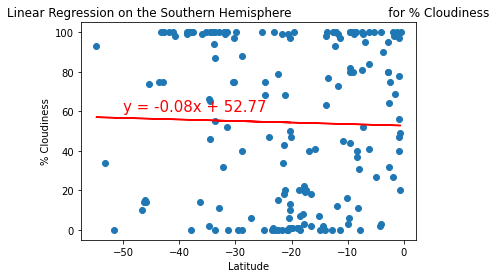

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

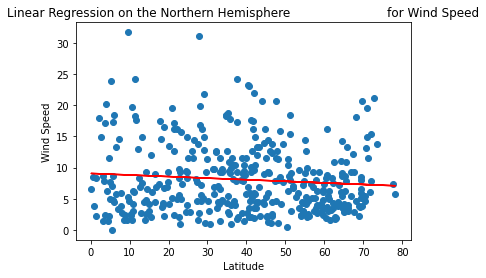

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

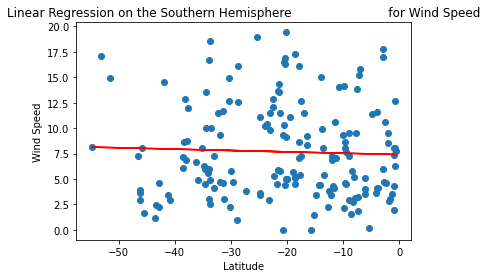

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))